In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/weatherAUS5000.csv',index_col=0)

In [3]:
data.shape

(5000, 22)

In [4]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [5]:
X.shape

(5000, 21)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5000 non-null   object 
 1   Location       5000 non-null   object 
 2   MinTemp        4979 non-null   float64
 3   MaxTemp        4987 non-null   float64
 4   Rainfall       4950 non-null   float64
 5   Evaporation    2841 non-null   float64
 6   Sunshine       2571 non-null   float64
 7   WindGustDir    4669 non-null   object 
 8   WindGustSpeed  4669 non-null   float64
 9   WindDir9am     4651 non-null   object 
 10  WindDir3pm     4887 non-null   object 
 11  WindSpeed9am   4949 non-null   float64
 12  WindSpeed3pm   4919 non-null   float64
 13  Humidity9am    4936 non-null   float64
 14  Humidity3pm    4880 non-null   float64
 15  Pressure9am    4506 non-null   float64
 16  Pressure3pm    4504 non-null   float64
 17  Cloud9am       3111 non-null   float64
 18  Cloud3pm

查看缺失值的比例

In [7]:
X.isnull().mean()

Date             0.0000
Location         0.0000
MinTemp          0.0042
MaxTemp          0.0026
Rainfall         0.0100
Evaporation      0.4318
Sunshine         0.4858
WindGustDir      0.0662
WindGustSpeed    0.0662
WindDir9am       0.0698
WindDir3pm       0.0226
WindSpeed9am     0.0102
WindSpeed3pm     0.0162
Humidity9am      0.0128
Humidity3pm      0.0240
Pressure9am      0.0988
Pressure3pm      0.0992
Cloud9am         0.3778
Cloud3pm         0.3976
Temp9am          0.0066
Temp3pm          0.0176
dtype: float64

In [8]:
Y.isnull().sum()

0

In [9]:
Y.unique()

array(['No', 'Yes'], dtype=object)

### 先分训练测试集、再去做数据预处理

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=20)

In [11]:
Xtrain.shape

(3500, 21)

In [12]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2103,2011-12-04,Mildura,11.2,25.4,0.0,10.8,13.4,SSE,48.0,SE,...,30.0,19.0,42.0,18.0,1022.2,1018.5,0.0,0.0,14.8,24.0
3090,2010-02-05,Penrith,22.1,30.1,17.8,NaN,NaN,ESE,41.0,N,...,6.0,15.0,93.0,76.0,NaN,NaN,NaN,NaN,24.6,28.3
1419,2016-01-10,Dartmoor,11.0,32.8,0.0,7.6,8.8,SSW,30.0,ENE,...,6.0,19.0,67.0,17.0,1016.8,1013.7,NaN,NaN,17.2,31.7
106,2015-12-14,Albany,13.5,22.4,0.0,6.0,8.6,NaN,NaN,WNW,...,4.0,NaN,71.0,NaN,1015.8,1014.8,6.0,NaN,19.5,NaN
4163,2010-06-01,Tuggeranong,0.1,15.3,0.0,NaN,NaN,NW,17.0,NaN,...,0.0,9.0,99.0,46.0,1021.9,1019.2,NaN,NaN,6.0,14.6


#### 回复索引顺序

In [13]:
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [14]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2011-12-04,Mildura,11.2,25.4,0.0,10.8,13.4,SSE,48.0,SE,...,30.0,19.0,42.0,18.0,1022.2,1018.5,0.0,0.0,14.8,24.0
1,2010-02-05,Penrith,22.1,30.1,17.8,NaN,NaN,ESE,41.0,N,...,6.0,15.0,93.0,76.0,NaN,NaN,NaN,NaN,24.6,28.3
2,2016-01-10,Dartmoor,11.0,32.8,0.0,7.6,8.8,SSW,30.0,ENE,...,6.0,19.0,67.0,17.0,1016.8,1013.7,NaN,NaN,17.2,31.7
3,2015-12-14,Albany,13.5,22.4,0.0,6.0,8.6,NaN,NaN,WNW,...,4.0,NaN,71.0,NaN,1015.8,1014.8,6.0,NaN,19.5,NaN
4,2010-06-01,Tuggeranong,0.1,15.3,0.0,NaN,NaN,NW,17.0,NaN,...,0.0,9.0,99.0,46.0,1021.9,1019.2,NaN,NaN,6.0,14.6


#### 处理标签
是否有样本不均衡问题？

In [15]:
Ytrain.value_counts()

No     2683
Yes     817
Name: RainTomorrow, dtype: int64

有轻微的样本不均衡问题

#### 标签编码

In [16]:
encoder = LabelEncoder().fit(Ytrain)
Ytrain = pd.DataFrame(encoder.transform(Ytrain))
Ytest = pd.DataFrame(encoder.transform(Ytest))

In [17]:
Ytrain.shape

(3500, 1)

标签处理后先保存

In [18]:
# Ytrain.to_csv('data/SVC_practice_Ytrain.csv')

#### 处理特征矩阵

描述性统计

In [19]:
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
MinTemp,3486.0,12.202897,6.336167,-8.5,-1.700,1.725,4.1,7.8,12.1,16.70,20.50,23.20,25.800,29.0
MaxTemp,3489.0,23.177587,7.099091,-3.7,9.200,13.000,14.6,18.0,22.6,28.20,32.90,35.50,40.024,46.4
Rainfall,3463.0,2.462778,7.894548,0.0,0.000,0.000,0.0,0.0,0.0,0.95,6.40,13.18,41.676,115.8
Evaporation,1984.0,5.597480,4.243286,0.0,0.400,0.800,1.4,2.6,4.8,7.60,10.14,12.60,19.800,56.0
Sunshine,1771.0,7.569509,3.796444,0.0,0.000,0.400,1.6,4.7,8.4,10.60,12.10,12.80,13.400,13.9
WindGustSpeed,3267.0,40.012856,13.479788,9.0,15.000,20.000,24.0,31.0,39.0,48.00,57.00,65.00,78.000,122.0
WindSpeed9am,3466.0,14.128102,8.887969,0.0,0.000,0.000,4.0,7.0,13.0,20.00,26.00,30.00,39.000,72.0
WindSpeed3pm,3441.0,18.660854,8.651307,0.0,2.000,6.000,7.0,13.0,19.0,24.00,30.00,33.00,43.000,61.0
Humidity9am,3457.0,69.150130,18.632930,2.0,18.560,37.000,45.0,57.0,70.0,83.00,94.00,98.00,100.000,100.0
Humidity3pm,3409.0,51.767967,20.493482,2.0,10.000,18.000,23.0,37.0,52.0,66.00,79.00,87.00,98.000,100.0


In [20]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
MinTemp,1493.0,11.969926,6.516204,-8.2,-2.016,1.720,3.80,7.3,11.6,16.5,21.00,23.100,25.900,28.5
MaxTemp,1498.0,23.065087,7.231870,-0.8,7.791,12.585,14.30,17.6,22.4,28.4,32.63,35.315,39.503,44.9
Rainfall,1487.0,2.298991,8.116537,0.0,0.000,0.000,0.00,0.0,0.0,0.4,5.48,13.200,38.712,105.6
Evaporation,857.0,5.708051,4.431817,0.2,0.600,1.000,1.40,2.6,4.8,7.6,10.60,13.600,22.776,42.2
Sunshine,800.0,7.538750,3.883813,0.0,0.000,0.200,1.20,4.5,8.5,10.7,12.00,12.700,13.300,13.7
WindGustSpeed,1402.0,39.684736,13.437848,9.0,15.000,20.000,24.00,30.0,39.0,48.0,57.00,63.000,76.000,100.0
WindSpeed9am,1483.0,13.795010,8.616812,0.0,0.000,0.000,4.00,7.0,13.0,19.0,26.00,30.000,37.000,52.0
WindSpeed3pm,1478.0,18.351150,8.757191,0.0,2.000,6.000,7.00,11.0,17.0,24.0,30.00,33.000,43.000,65.0
Humidity9am,1479.0,68.499662,19.226619,4.0,19.560,33.000,43.80,57.0,69.0,83.0,94.00,98.000,100.000,100.0
Humidity3pm,1471.0,51.162475,20.926047,3.0,7.000,15.500,22.00,36.0,53.0,65.0,78.00,87.000,96.000,100.0


可以看到没有异常值，所谓异常值，指的是不符合数据意义的值，例如说降雨量是负的就被称为异常值

若较少，则应为人为输入错误，应当删掉，若较多，则与数据提者沟通，或者用缺失值的方法对待，替换成均值或者其他策略

处理顺序：较难理解的特征(日期) -> 缺失值 -> 编码

#### 日期的处理

In [21]:
print(data.iloc[0,0])
type(data.iloc[0,0])

2015-03-24


str

日期是连续的还是分类的？可以理解为分了365类的分类型变量，因为不能取小数

先看下日期有无重复
- 有重复，可能是有更细的时间单位，或者一天中不同地点、不同位置等等特征
- 无重复，可以编码成连续性变量，例如1-365

In [22]:
data.iloc[:,0].value_counts()

2013-12-20    7
2015-07-03    7
2012-09-18    6
2016-11-01    6
2017-01-09    6
             ..
2016-11-09    1
2009-07-23    1
2016-07-15    1
2013-04-08    1
2010-05-14    1
Name: Date, Length: 2534, dtype: int64

很明显有重复，因为是不同地点的相同时间的数据

观察到有一列降雨量和预测很相关

In [23]:
Xtrain['Rainfall'].isnull().sum()

37

可见有37个缺失值，我们可以新加入一列，代表今天下没下雨

In [24]:
Xtrain.loc[Xtrain.loc[:,'Rainfall']>=1, 'Raintoday'] = 'Yes'
Xtrain.loc[Xtrain.loc[:,'Rainfall']<1, 'Raintoday'] = 'No'
Xtrain.loc[Xtrain.loc[:,'Rainfall']==np.nan, 'Raintoday'] = np.nan

/Users/qi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/qi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [25]:
Xtrain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,2011-12-04,Mildura,11.2,25.4,0.0,10.8,13.4,SSE,48.0,SE,...,19.0,42.0,18.0,1022.2,1018.5,0.0,0.0,14.8,24.0,No
1,2010-02-05,Penrith,22.1,30.1,17.8,NaN,NaN,ESE,41.0,N,...,15.0,93.0,76.0,NaN,NaN,NaN,NaN,24.6,28.3,Yes
2,2016-01-10,Dartmoor,11.0,32.8,0.0,7.6,8.8,SSW,30.0,ENE,...,19.0,67.0,17.0,1016.8,1013.7,NaN,NaN,17.2,31.7,No
3,2015-12-14,Albany,13.5,22.4,0.0,6.0,8.6,NaN,NaN,WNW,...,NaN,71.0,NaN,1015.8,1014.8,6.0,NaN,19.5,NaN,No
4,2010-06-01,Tuggeranong,0.1,15.3,0.0,NaN,NaN,NW,17.0,NaN,...,9.0,99.0,46.0,1021.9,1019.2,NaN,NaN,6.0,14.6,No


In [26]:
Xtrain.loc[:,'Raintoday']

0        No
1       Yes
2        No
3        No
4        No
       ... 
3495     No
3496     No
3497    Yes
3498     No
3499     No
Name: Raintoday, Length: 3500, dtype: object

In [27]:
Xtest.loc[Xtest.loc[:,'Rainfall']>=1, 'Raintoday'] = 'Yes'
Xtest.loc[Xtest.loc[:,'Rainfall']<1, 'Raintoday'] = 'No'
Xtest.loc[Xtest.loc[:,'Rainfall']==np.nan, 'Raintoday'] = np.nan

/Users/qi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/qi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


至此，我们就创造出了一个新的特征，然后还能想到，降雨量和月份有可能有关系，因此我们创造月份这个变量，来代替日期这个特征

In [28]:
Xtrain.loc[:,'Date'] = Xtrain.loc[:,'Date'].apply(lambda x : int(x.split('-')[1]))

/Users/qi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [29]:
Xtrain.loc[:,'Date'].value_counts()

3     333
5     316
7     316
6     307
1     304
10    286
9     285
11    283
4     280
12    269
8     262
2     259
Name: Date, dtype: int64

改一下列名字

In [30]:
Xtrain = Xtrain.rename(columns={'Date':'Month'})
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          3500 non-null   int64  
 1   Location       3500 non-null   object 
 2   MinTemp        3486 non-null   float64
 3   MaxTemp        3489 non-null   float64
 4   Rainfall       3463 non-null   float64
 5   Evaporation    1984 non-null   float64
 6   Sunshine       1771 non-null   float64
 7   WindGustDir    3267 non-null   object 
 8   WindGustSpeed  3267 non-null   float64
 9   WindDir9am     3261 non-null   object 
 10  WindDir3pm     3419 non-null   object 
 11  WindSpeed9am   3466 non-null   float64
 12  WindSpeed3pm   3441 non-null   float64
 13  Humidity9am    3457 non-null   float64
 14  Humidity3pm    3409 non-null   float64
 15  Pressure9am    3150 non-null   float64
 16  Pressure3pm    3149 non-null   float64
 17  Cloud9am       2172 non-null   float64
 18  Cloud3pm

对测试集做相同的操作

In [31]:
Xtest.loc[:,'Date'] = Xtest.loc[:,'Date'].apply(lambda x : int(x.split('-')[1]))
Xtest = Xtest.rename(columns={'Date':'Month'})
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          1500 non-null   int64  
 1   Location       1500 non-null   object 
 2   MinTemp        1493 non-null   float64
 3   MaxTemp        1498 non-null   float64
 4   Rainfall       1487 non-null   float64
 5   Evaporation    857 non-null    float64
 6   Sunshine       800 non-null    float64
 7   WindGustDir    1402 non-null   object 
 8   WindGustSpeed  1402 non-null   float64
 9   WindDir9am     1390 non-null   object 
 10  WindDir3pm     1468 non-null   object 
 11  WindSpeed9am   1483 non-null   float64
 12  WindSpeed3pm   1478 non-null   float64
 13  Humidity9am    1479 non-null   float64
 14  Humidity3pm    1471 non-null   float64
 15  Pressure9am    1356 non-null   float64
 16  Pressure3pm    1355 non-null   float64
 17  Cloud9am       939 non-null    float64
 18  Cloud3pm

#### 地点的处理

In [32]:
Xtrain.loc[:,'Location'].value_counts().count()

49

导入城市经纬度和城市气候表格

In [33]:
cityll = pd.read_csv('data/cityll.csv',index_col=0)
city_climate = pd.read_csv('data/Cityclimate.csv')

In [34]:
cityll.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Adelaide,34.9285°,138.6007°,"S,",E
1,Albany,35.0275°,117.8840°,"S,",E
2,Albury,36.0737°,146.9135°,"S,",E
3,Wodonga,36.1241°,146.8818°,"S,",E
4,AliceSprings,23.6980°,133.8807°,"S,",E


In [35]:
city_climate.head()

,City,Climate
0,Adelaide,Warm temperate
1,Albany,Mild temperate
2,Albury,"Hot dry summer, cool winter"
3,Wodonga,"Hot dry summer, cool winter"
4,AliceSprings,"Hot dry summer, warm winter"


去掉经纬度的符号

In [36]:
cityll.loc[0,'Latitude'][0:-1]

'34.9285'

In [37]:
cityll.loc[:,'Latitude'] = cityll.loc[:,'Latitude'].apply(lambda x: float(x[0:-1]))

In [38]:
cityll.loc[:,'Longitude'] = cityll.loc[:,'Longitude'].apply(lambda x: float(x[0:-1]))

In [39]:
cityll.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Adelaide,34.9285,138.6007,"S,",E
1,Albany,35.0275,117.8840,"S,",E
2,Albury,36.0737,146.9135,"S,",E
3,Wodonga,36.1241,146.8818,"S,",E
4,AliceSprings,23.6980,133.8807,"S,",E


取出我们需要的列，城市名字，经纬度

In [40]:
citylld = cityll.iloc[:,[0,1,2]]
citylld.head()

,City,Latitude,Longitude
0,Adelaide,34.9285,138.6007
1,Albany,35.0275,117.8840
2,Albury,36.0737,146.9135
3,Wodonga,36.1241,146.8818
4,AliceSprings,23.6980,133.8807


加入气候这一列

In [41]:
citylld.loc[:,'climate'] = city_climate.iloc[:,1]
citylld.head()

/Users/qi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,City,Latitude,Longitude,climate
0,Adelaide,34.9285,138.6007,Warm temperate
1,Albany,35.0275,117.8840,Mild temperate
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter"
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter"
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter"


In [42]:
citylld.loc[:,'climate'].value_counts()

Hot dry summer, cool winter          24
Warm temperate                       18
Hot dry summer, warm winter          18
High humidity summer, warm winter    17
Mild temperate                        9
Cool temperate                        9
Warm humid summer, mild winter        5
Name: climate, dtype: int64

In [43]:
samplecity = pd.read_csv('data/samplecity.csv',index_col=0)
#我们对samplecity也执行同样的处理:去掉经纬度中度数的符号，并且舍弃我们的经纬度的方向
samplecity["Latitudenum"] = samplecity["Latitude"].apply(lambda x:float(x[:-1]))
samplecity["Longitudenum"] = samplecity["Longitude"].apply(lambda x:float(x[:-1]))
samplecityd = samplecity.iloc[:,[0,5,6]]
samplecityd.head()

,City,Latitudenum,Longitudenum
0,Canberra,35.2809,149.1300
1,Sydney,33.8688,151.2093
2,Perth,31.9505,115.8605
3,Darwin,12.4634,130.8456
4,Hobart,42.8821,147.3272


现在，将气象站的经纬度和主要城市的经纬度进行计算，转换成距离

In [44]:
from math import radians, sin, cos, acos
citylld.loc[:,"slat"] = citylld.iloc[:,1].apply(lambda x : radians(x))
citylld.loc[:,"slon"] = citylld.iloc[:,2].apply(lambda x : radians(x))
samplecityd.loc[:,"elat"] = samplecityd.iloc[:,1].apply(lambda x : radians(x))
samplecityd.loc[:,"elon"] = samplecityd.iloc[:,2].apply(lambda x : radians(x))

/Users/qi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [45]:
samplecityd.head()

,City,Latitudenum,Longitudenum,elat,elon
0,Canberra,35.2809,149.1300,0.615768,2.602810
1,Sydney,33.8688,151.2093,0.591122,2.639100
2,Perth,31.9505,115.8605,0.557641,2.022147
3,Darwin,12.4634,130.8456,0.217527,2.283687
4,Hobart,42.8821,147.3272,0.748434,2.571345


可以看到已经转换成了以弧度形式的经纬度

下面用地理上的距离计算方法来计算并一一对应到相应的城市和气候上

In [46]:
import sys
for i in range(samplecityd.shape[0]):
    slat = citylld.loc[:,"slat"]
    slon = citylld.loc[:,"slon"]
    elat = samplecityd.loc[i,"elat"]
    elon = samplecityd.loc[i,"elon"]
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) +np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    city_index = np.argsort(dist)[0] #每次计算后，取距离最近的城市，然后将最近的城市和城市对应的气候都匹配到samplecityd中 
    samplecityd.loc[i,"closest_city"] = citylld.loc[city_index,"City"]
    samplecityd.loc[i,"climate"] = citylld.loc[city_index,"climate"]

/Users/qi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/qi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/qi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inp

In [47]:
samplecityd.head()

,City,Latitudenum,Longitudenum,elat,elon,closest_city,climate
0,Canberra,35.2809,149.1300,0.615768,2.602810,Canberra,Cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,Warm temperate
2,Perth,31.9505,115.8605,0.557641,2.022147,Perth,Warm temperate
3,Darwin,12.4634,130.8456,0.217527,2.283687,Darwin,"High humidity summer, warm winter"
4,Hobart,42.8821,147.3272,0.748434,2.571345,Hobart,Cool temperate


In [48]:
#查看气候的分布
samplecityd["climate"].value_counts()

Warm temperate                       15
Mild temperate                       10
Cool temperate                        9
Hot dry summer, cool winter           6
High humidity summer, warm winter     4
Hot dry summer, warm winter           3
Warm humid summer, mild winter        2
Name: climate, dtype: int64

In [49]:
#确认无误后，取出样本城市所对应的气候，并保存
locafinal = samplecityd.iloc[:,[0,-1]]
locafinal.head()

,City,climate
0,Canberra,Cool temperate
1,Sydney,Warm temperate
2,Perth,Warm temperate
3,Darwin,"High humidity summer, warm winter"
4,Hobart,Cool temperate


设置 Location 为索引

In [50]:
locafinal.columns = ['Location', 'Climate']

In [51]:
locafinal = locafinal.set_index(keys='Location')
locafinal.head()

,Climate
Location,
Canberra,Cool temperate
Sydney,Warm temperate
Perth,Warm temperate
Darwin,"High humidity summer, warm winter"
Hobart,Cool temperate


拿到最终的地点和气候的对应关系后，现在要更新训练数据，用气候来代替位置信息

In [52]:
Xtrain.loc[:,'Location'] = Xtrain.loc[:,'Location'].map(locafinal.iloc[:,0])
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,12,"Hot dry summer, cool winter",11.2,25.4,0.0,10.8,13.4,SSE,48.0,SE,...,19.0,42.0,18.0,1022.2,1018.5,0.0,0.0,14.8,24.0,No
1,2,Warm temperate,22.1,30.1,17.8,NaN,NaN,ESE,41.0,N,...,15.0,93.0,76.0,NaN,NaN,NaN,NaN,24.6,28.3,Yes
2,1,Mild temperate,11.0,32.8,0.0,7.6,8.8,SSW,30.0,ENE,...,19.0,67.0,17.0,1016.8,1013.7,NaN,NaN,17.2,31.7,No
3,12,Mild temperate,13.5,22.4,0.0,6.0,8.6,NaN,NaN,WNW,...,NaN,71.0,NaN,1015.8,1014.8,6.0,NaN,19.5,NaN,No
4,6,Cool temperate,0.1,15.3,0.0,NaN,NaN,NW,17.0,NaN,...,9.0,99.0,46.0,1021.9,1019.2,NaN,NaN,6.0,14.6,No


将逗号和空格全部替换掉

In [53]:
# 将location中的内容替换，并且确保匹配进入的气候字符串中不含有逗号，
# 气候两边不含有空格 #我们使用re这个模块来消除逗号 #re.sub(希望替换的值，希望被替换成的值，要操作的字符串)
# x.strip()是去掉空格的函数

Xtrain["Location"] = Xtrain["Location"].apply(lambda x:re.sub(",","",x.strip()))
Xtest["Location"] = Xtest["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))

In [54]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,12,Hot dry summer cool winter,11.2,25.4,0.0,10.8,13.4,SSE,48.0,SE,...,19.0,42.0,18.0,1022.2,1018.5,0.0,0.0,14.8,24.0,No
1,2,Warm temperate,22.1,30.1,17.8,NaN,NaN,ESE,41.0,N,...,15.0,93.0,76.0,NaN,NaN,NaN,NaN,24.6,28.3,Yes
2,1,Mild temperate,11.0,32.8,0.0,7.6,8.8,SSW,30.0,ENE,...,19.0,67.0,17.0,1016.8,1013.7,NaN,NaN,17.2,31.7,No
3,12,Mild temperate,13.5,22.4,0.0,6.0,8.6,NaN,NaN,WNW,...,NaN,71.0,NaN,1015.8,1014.8,6.0,NaN,19.5,NaN,No
4,6,Cool temperate,0.1,15.3,0.0,NaN,NaN,NW,17.0,NaN,...,9.0,99.0,46.0,1021.9,1019.2,NaN,NaN,6.0,14.6,No


In [55]:
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,11,Warm temperate,10.5,30.9,0.0,13.6,NaN,E,41.0,NE,...,11.0,34.0,13.0,1018.0,1015.5,NaN,NaN,20.8,29.9,No
1,12,Cool temperate,22.2,27.8,0.2,NaN,NaN,S,39.0,W,...,11.0,71.0,81.0,1008.6,1008.6,NaN,NaN,25.4,26.0,No
2,4,Cool temperate,1.9,4.7,5.8,NaN,NaN,WSW,52.0,W,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,4,Warm humid summer mild winter,13.5,24.5,0.0,3.6,9.9,S,30.0,S,...,20.0,71.0,61.0,1014.3,1012.7,0.0,1.0,21.4,24.1,No
4,12,Mild temperate,15.1,20.9,0.0,4.8,8.4,WNW,46.0,W,...,15.0,55.0,32.0,1008.1,1012.2,6.0,6.0,16.7,20.1,No


In [56]:
Xtrain = Xtrain.rename(columns={'Location':'Climate'})
Xtest = Xtest.rename(columns={'Location':'Climate'})

In [57]:
Xtrain.head(2)

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,12,Hot dry summer cool winter,11.2,25.4,0.0,10.8,13.4,SSE,48.0,SE,...,19.0,42.0,18.0,1022.2,1018.5,0.0,0.0,14.8,24.0,No
1,2,Warm temperate,22.1,30.1,17.8,NaN,NaN,ESE,41.0,N,...,15.0,93.0,76.0,NaN,NaN,NaN,NaN,24.6,28.3,Yes


#### 缺失值
一般来说，我们用训练集上面的均值去填补训练和测试集上的缺失值

In [58]:
Xtrain.isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.004000
MaxTemp          0.003143
Rainfall         0.010571
Evaporation      0.433143
Sunshine         0.494000
WindGustDir      0.066571
WindGustSpeed    0.066571
WindDir9am       0.068286
WindDir3pm       0.023143
WindSpeed9am     0.009714
WindSpeed3pm     0.016857
Humidity9am      0.012286
Humidity3pm      0.026000
Pressure9am      0.100000
Pressure3pm      0.100286
Cloud9am         0.379429
Cloud3pm         0.403429
Temp9am          0.006286
Temp3pm          0.019429
Raintoday        0.010571
dtype: float64

先找出是分类性特征的列

In [59]:
cate = Xtrain.columns[Xtrain.dtypes == 'object'].tolist()
cate

['Climate', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Raintoday']

还有两个虽然是数字，但是也是分类特征

In [60]:
cate = cate + ['Cloud9am', 'Cloud3pm']
cate

['Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Raintoday',
 'Cloud9am',
 'Cloud3pm']

对于分类性特征，用众数进行填补 SimpleImputer

In [61]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

用训练集来训练

In [62]:
si.fit(Xtrain.loc[:,cate])

SimpleImputer(strategy='most_frequent')

用训练好的 si 来处理训练集和测试集

In [63]:
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,12,Hot dry summer cool winter,11.2,25.4,0.0,10.8,13.4,SSE,48.0,SE,...,19.0,42.0,18.0,1022.2,1018.5,0.0,0.0,14.8,24.0,No
1,2,Warm temperate,22.1,30.1,17.8,NaN,NaN,ESE,41.0,N,...,15.0,93.0,76.0,NaN,NaN,7.0,7.0,24.6,28.3,Yes
2,1,Mild temperate,11.0,32.8,0.0,7.6,8.8,SSW,30.0,ENE,...,19.0,67.0,17.0,1016.8,1013.7,7.0,7.0,17.2,31.7,No
3,12,Mild temperate,13.5,22.4,0.0,6.0,8.6,E,NaN,WNW,...,NaN,71.0,NaN,1015.8,1014.8,6.0,7.0,19.5,NaN,No
4,6,Cool temperate,0.1,15.3,0.0,NaN,NaN,NW,17.0,N,...,9.0,99.0,46.0,1021.9,1019.2,7.0,7.0,6.0,14.6,No


In [64]:
Xtrain.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
Raintoday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

可以看到，没有缺失值了已经。

In [65]:
Xtest.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
Raintoday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

#### 编码
先用普通方式编码

In [66]:
oe = OrdinalEncoder()

In [67]:
oe.fit(Xtrain.loc[:,cate])

OrdinalEncoder()

In [68]:
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

In [69]:
Xtrain.loc[:,cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,Raintoday,Cloud9am,Cloud3pm
0,2.0,10.0,9.0,10.0,0.0,0.0,0.0
1,6.0,2.0,3.0,5.0,1.0,7.0,7.0
2,4.0,11.0,1.0,7.0,0.0,7.0,7.0
3,4.0,0.0,14.0,9.0,0.0,6.0,7.0
4,0.0,7.0,3.0,5.0,0.0,7.0,7.0


#### 处理连续型变量

In [70]:
col = Xtrain.columns.tolist()

In [71]:
for i in cate:
    col.remove(i)
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [72]:
si_1 = SimpleImputer(missing_values=np.nan, strategy='mean')
si_1.fit(Xtrain.loc[:,col])

SimpleImputer()

In [73]:
Xtrain.loc[:,col] = si_1.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = si_1.transform(Xtest.loc[:,col])
Xtrain.loc[:,col].isnull().mean()

Month            0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
dtype: float64

### 无量纲化(不对分类型变量处理)

In [74]:
col.remove('Month')
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

**标准化不会改变数据的分布，虽然标准化之后均值为零方差为一，但是不满足标准正态分布！**

In [75]:
ss = StandardScaler()
ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

In [76]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,3500.0,6.410571e+00,3.416878,1.000000,3.000000e+00,6.000000e+00,9.000000e+00,12.000000
Climate,3500.0,3.337714e+00,2.315055,0.000000,1.000000e+00,4.000000e+00,6.000000e+00,6.000000
MinTemp,3500.0,-1.935595e-16,1.000143,-3.274441,-6.963773e-01,-1.627459e-02,7.112771e-01,2.656687
MaxTemp,3500.0,3.186340e-16,1.000143,-3.792568,-7.305845e-01,-8.150049e-02,6.945782e-01,3.276804
Rainfall,3500.0,-5.536206e-16,1.000143,-0.313667,-3.136667e-01,-3.136667e-01,-1.863038e-01,14.434966
Evaporation,3500.0,1.276771e-17,1.000143,-1.752519,-3.749199e-01,2.780805e-16,2.780805e-16,15.780565
Sunshine,3500.0,1.081334e-16,1.000143,-2.803742,3.289808e-16,3.289808e-16,3.076135e-01,2.344810
WindGustDir,3500.0,7.115429e+00,4.938935,0.000000,2.000000e+00,7.000000e+00,1.100000e+01,15.000000
WindGustSpeed,3500.0,1.189525e-16,1.000143,-2.381687,-6.921581e-01,-7.778404e-02,4.597933e-01,6.296347
WindDir9am,3500.0,7.017714e+00,4.529378,0.000000,3.000000e+00,7.000000e+00,1.100000e+01,15.000000


**至此，数据预处理部分完成。**

## 构建模型

In [77]:
import datetime
from time import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression as LR

In [78]:
Ytest = Ytest.iloc[:,0].ravel()
Ytrain = Ytrain.iloc[:,0].ravel()

In [79]:
Kernal = ['linear', 'poly', 'rbf', 'sigmoid']
time0 = time()
for k in Kernal:
    clf = SVC(kernel=k,
             degree=1,
             gamma='auto',
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest, Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest, clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(k,score,recall,auc)) 
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

linear 's testing accuracy 0.843333, recall is 0.462733', auc is 0.869220
00:01:132761
poly 's testing accuracy 0.846000, recall is 0.462733', auc is 0.867678
00:01:630417
rbf 's testing accuracy 0.824000, recall is 0.310559', auc is 0.812481
00:03:445863
sigmoid 's testing accuracy 0.666667, recall is 0.127329', auc is 0.428189
00:04:157012


此时确定，数据已经归一化，且 rbf 的 recall 仍然不是很高，证明此数据绝对是线性的，选择线性核，然后我们可以有不同的思路：
- 追求 recall 精确的预测出雨天，即使错误的分类晴天也没关系
- 追求整体正确率 accuracy
- 追求 recall 和 accuary 的平衡

#### 追求 Recall
加上class_weight

In [80]:
Kernal = ['linear', 'poly', 'rbf', 'sigmoid']
time0 = time()
for k in Kernal:
    clf = SVC(kernel=k,
              degree=1,
              gamma='auto',
              class_weight='balanced'
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest, Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest, clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(k,score,recall,auc)) 
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

linear 's testing accuracy 0.794667, recall is 0.757764', auc is 0.869299
00:01:471745
poly 's testing accuracy 0.794667, recall is 0.742236', auc is 0.867082
00:02:129901
rbf 's testing accuracy 0.799333, recall is 0.583851', auc is 0.819602
00:04:193806
sigmoid 's testing accuracy 0.569333, recall is 0.245342', auc is 0.428142
00:05:721184


手动设置权重

In [81]:
clf = SVC(kernel='linear',
          gamma='auto',
          class_weight={1:5} # 这里是类别1:权重5，不是一比十的关系
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest, Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest, clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc)) 
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

testing accuracy 0.745333, recall is 0.860248', auc is 0.870646
00:07:809615


当然，权重给的越高，recall越大，但是精确度也会降低

#### 追求 accuracy
先看下正负样本各是多少

In [82]:
caluec = pd.Series(Ytest).value_counts()
caluec

0    1178
1     322
dtype: int64

查看特异度，也就是多数样本的分类正确情况

In [83]:
clf = SVC(kernel='linear',
          gamma='auto',
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)

In [84]:
cm = confusion_matrix(Ytest, result, labels=(1,0))
cm

array([[ 149,  173],
       [  62, 1116]])

特异度

In [85]:
specificity = cm[1,1]/cm[1,:].sum()
specificity

0.9473684210526315

可以看到，对于多数类，模型已经表现很好了，但是，能不能微调，使得不伤及多数类的情况下，能让少数类正确率更高呢？

In [86]:
irange = np.linspace(0.01,0.05,10)

for i in irange:
    clf = SVC(kernel='linear',
              gamma='auto',
              class_weight={1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest, Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest, clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc)) 

under ratio 1:1.010000 testing accuracy 0.844000, recall is 0.465839', auc is 0.869062
under ratio 1:1.014444 testing accuracy 0.843333, recall is 0.465839', auc is 0.869122
under ratio 1:1.018889 testing accuracy 0.844667, recall is 0.472050', auc is 0.869128
under ratio 1:1.023333 testing accuracy 0.844667, recall is 0.472050', auc is 0.869178
under ratio 1:1.027778 testing accuracy 0.844667, recall is 0.472050', auc is 0.869267
under ratio 1:1.032222 testing accuracy 0.844000, recall is 0.472050', auc is 0.869251
under ratio 1:1.036667 testing accuracy 0.844667, recall is 0.475155', auc is 0.869236
under ratio 1:1.041111 testing accuracy 0.844000, recall is 0.472050', auc is 0.869138
under ratio 1:1.045556 testing accuracy 0.844000, recall is 0.475155', auc is 0.869130
under ratio 1:1.050000 testing accuracy 0.844667, recall is 0.475155', auc is 0.869106


可以看到，通过给少数类加权重的方法似乎不能让整体正确率变化太大。

调节参数似乎不太能够进一步提升了，那么我们**换模型**，逻辑回归

In [87]:
clf_lr = LR(solver='liblinear').fit(Xtrain, Ytrain)
clf_lr.score(Xtest, Ytest)

0.8466666666666667

In [88]:
crange = np.linspace(3,5,10)

for c in crange:
    clf_lr = LR(solver='liblinear', C=c).fit(Xtrain, Ytrain)
    print('c : %.5f, score : %.5f' % (c,clf_lr.score(Xtest, Ytest)))

c : 3.00000, score : 0.84800
c : 3.22222, score : 0.84800
c : 3.44444, score : 0.84800
c : 3.66667, score : 0.84800
c : 3.88889, score : 0.84800
c : 4.11111, score : 0.84800
c : 4.33333, score : 0.84800
c : 4.55556, score : 0.84800
c : 4.77778, score : 0.84800
c : 5.00000, score : 0.84800


#### 追求平衡
画 ROC 曲线

In [89]:
clf = SVC(kernel='linear',
          gamma='auto',
          ).fit(Xtrain, Ytrain)

In [90]:
FPR, recall, Thresholds = roc_curve(Ytest, clf.decision_function(Xtest), pos_label=1)

In [91]:
area = roc_auc_score(Ytest, clf.decision_function(Xtest))
area

0.8692198589039218

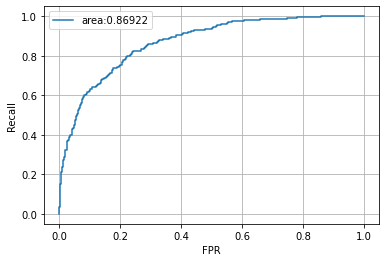

In [92]:
plt.figure()
plt.plot(FPR, recall, label='area:%.5f'%(area))
plt.grid();plt.legend()
plt.xlabel('FPR'); plt.ylabel('Recall')
plt.show()

In [93]:
better_index = (recall - FPR).tolist().index((recall - FPR).max())
better_index

224

最佳的阈值

In [94]:
Thresholds[better_index]

-1.0115493459956948

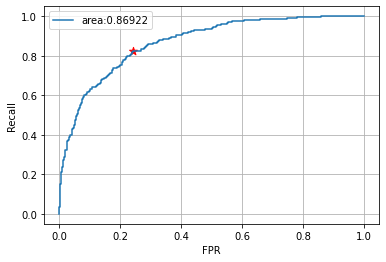

In [95]:
plt.figure()
plt.plot(FPR, recall, label='area:%.5f'%(area))
plt.scatter(FPR[better_index], recall[better_index], marker='*', c='r', s=70)
plt.grid();plt.legend()
plt.xlabel('FPR'); plt.ylabel('Recall')
plt.show()